In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and configure FEC and CS timestamp data as dataframe

In [2]:
df_fec = pd.read_csv("../../Data/FEC/mouse_0_fec_2025-04-21_14-20-04.csv")  # df containing eyeblink fraction data
df_cs = pd.read_csv("../../Data/stim/mouse_0_stim_2025-04-21_14-20-04.csv")  # df containing timestamp of CS for each trial

# Convert Trial #'s to ints
df_fec["Trial #"] = df_fec["Trial #"].astype(int)
df_cs["Trial #"] = df_cs["Trial #"].astype(int)

# Convert timestamp strings to datetime
df_fec["Timestamp"] = pd.to_datetime(df_fec["Timestamp"])
df_cs["CS Timestamp"] = pd.to_datetime(df_cs["CS Timestamp"])
# Convert FEC values to floats
df_fec["FEC"] = df_fec["FEC"].astype(float)

# Convert Airpuff strings to bool
df_cs["Airpuff"] = df_cs["Airpuff"].astype(bool)

In [3]:
print(len(df_fec))
df_fec.head()

838


,Timestamp,Trial #,FEC
0,2025-04-21 14:19:27.759844,1,0.148032
1,2025-04-21 14:19:27.803990,1,0.149052
2,2025-04-21 14:19:27.837539,1,0.148922
3,2025-04-21 14:19:27.880136,1,0.148779
4,2025-04-21 14:19:27.929688,1,0.148377


In [4]:
print(len(df_cs))
df_cs.head()

3


,Trial #,CS Timestamp,Airpuff
0,1,2025-04-21 14:19:27.781828,True
1,2,2025-04-21 14:19:46.634751,True
2,3,2025-04-21 14:19:59.879470,True


### Combine dataframes 

In [5]:
# Merge the dataframes based on the 'Trial #' column
merged_df = pd.merge(df_fec, df_cs, on='Trial #', how='left')

# Calculate timestamps relative to CS onset
merged_df["Relative Timestamp"] = pd.to_timedelta(merged_df["Timestamp"] - merged_df["CS Timestamp"])  # calc and convert to timedeltas
merged_df["Relative Timestamp"] = merged_df["Relative Timestamp"].dt.total_seconds() * 1000  # convert to milliseconds
merged_df.head()

,Timestamp,Trial #,FEC,CS Timestamp,Airpuff,Relative Timestamp
0,2025-04-21 14:19:27.759844,1,0.148032,2025-04-21 14:19:27.781828,True,-21.984
1,2025-04-21 14:19:27.803990,1,0.149052,2025-04-21 14:19:27.781828,True,22.162
2,2025-04-21 14:19:27.837539,1,0.148922,2025-04-21 14:19:27.781828,True,55.711
3,2025-04-21 14:19:27.880136,1,0.148779,2025-04-21 14:19:27.781828,True,98.308
4,2025-04-21 14:19:27.929688,1,0.148377,2025-04-21 14:19:27.781828,True,147.860


## Recreate graph of "FEC vs. Time from CS onset" from the paper

In [6]:
filter = (merged_df['Relative Timestamp'] >= 0) & (merged_df['Trial #'] == 1)
df = merged_df[filter]
df.tail()

,Timestamp,Trial #,FEC,CS Timestamp,Airpuff,Relative Timestamp
421,2025-04-21 14:19:46.177438,1,0.138642,2025-04-21 14:19:27.781828,True,18395.610
422,2025-04-21 14:19:46.208862,1,0.139188,2025-04-21 14:19:27.781828,True,18427.034
423,2025-04-21 14:19:46.255794,1,0.140178,2025-04-21 14:19:27.781828,True,18473.966
424,2025-04-21 14:19:46.302410,1,0.138972,2025-04-21 14:19:27.781828,True,18520.582
425,2025-04-21 14:19:46.349243,1,0.138987,2025-04-21 14:19:27.781828,True,18567.415


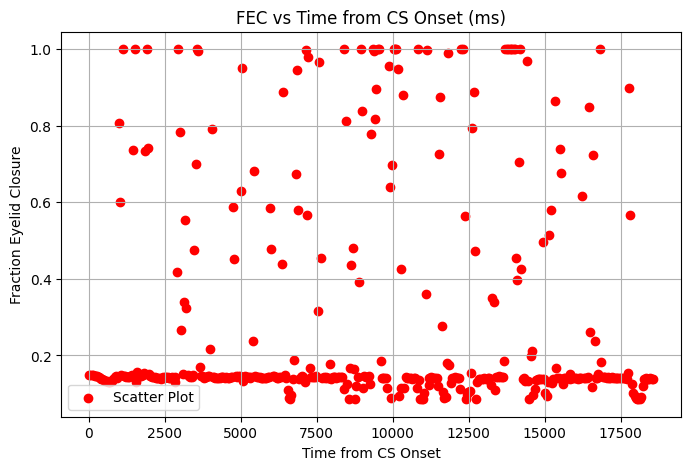

In [7]:
# Create plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Relative Timestamp'], df['FEC'], color='red', label='Scatter Plot')

plt.xlabel('Time from CS Onset')
plt.ylabel('Fraction Eyelid Closure')
plt.title('FEC vs Time from CS Onset (ms)')
plt.legend()
plt.grid(True)
plt.show()